#### Formula for LCG:

$$
X_{k+1} = (a \cdot X_k + c) \mod m
$$

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
class LCG:
    def __init__(self, seed=0):
        self.m = 2**31 - 1
        self.a = 16807
        self.c = 0
        self.state = seed % self.m # this is the current variable of Xk
    
    def rand01(self):
        self.state = (self.a * self.state + self.c) % self.m
        ## return in the range of [0, 1)
        return self.state / self.m
    
    def uniform(self, upper, lower):
        ## scale to [lower, upper)
        return lower + (upper - lower) * self.rand01()
    
    def normal(self, mu, sigma):
        u1 = self.rand01()
        u2 = self.rand01()

        z1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        # z1 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)

        ## scale to a general normal distribution with a given mu and sigma
        x = mu + z1 * sigma
        return x

    def poisson(self, lamb):
        L = math.exp(-lamb)
        k = 0
        p = 1
        while (p > L):
            k += 1
            p *= self.rand01()
        return k - 1

#### Generate and plot random numbers within a range which resemble the uniform distribution

In [3]:
n = 1000
upper, lower = 5.0, 100.0

(array([ 89.,  92., 100.,  97.,  89., 114., 111., 100.,  97., 111.]),
 array([ 5.15075631, 14.63255795, 24.1143596 , 33.59616125, 43.0779629 ,
        52.55976455, 62.04156619, 71.52336784, 81.00516949, 90.48697114,
        99.96877279]),
 <BarContainer object of 10 artists>)

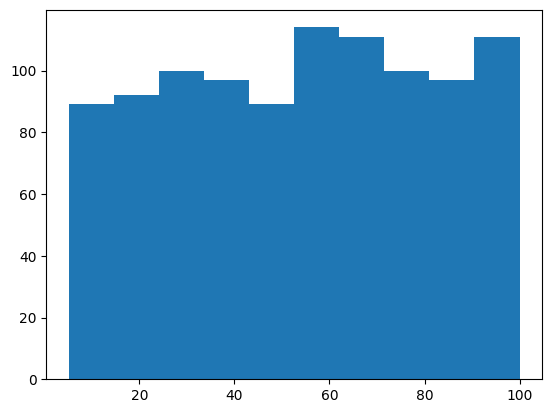

In [4]:
rng = LCG(seed=42)
data = [rng.uniform(upper, lower) for _ in range(n)]
## plot a histogram

plt.hist(data, bins=10)

#### Generate and plot random numbers with a given mean and standard deviation from a normal distribution

In [5]:
mu = 0
sigma = 1
normal_data = [rng.normal(mu, sigma) for _ in range(n)]

(array([  1.,   0.,   1.,   5.,  16.,  32.,  46.,  67., 115., 146., 148.,
        139., 110.,  78.,  47.,  24.,  14.,   9.,   1.,   1.]),
 array([-3.74359271, -3.38583506, -3.02807741, -2.67031977, -2.31256212,
        -1.95480447, -1.59704682, -1.23928917, -0.88153152, -0.52377387,
        -0.16601622,  0.19174142,  0.54949907,  0.90725672,  1.26501437,
         1.62277202,  1.98052967,  2.33828732,  2.69604497,  3.05380262,
         3.41156026]),
 <BarContainer object of 20 artists>)

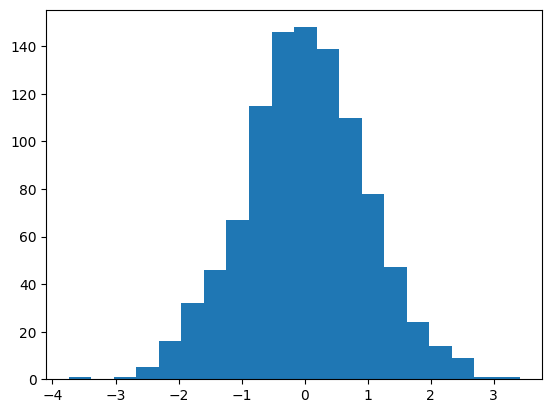

In [6]:
plt.hist(normal_data, bins=20)

In [7]:
round(np.mean(normal_data)), round(np.std(normal_data))

(0, 1)

#### Poisson Distribution

In [8]:
n = 10000
poisson_data = [rng.poisson(lamb=10) for _ in range(n)]

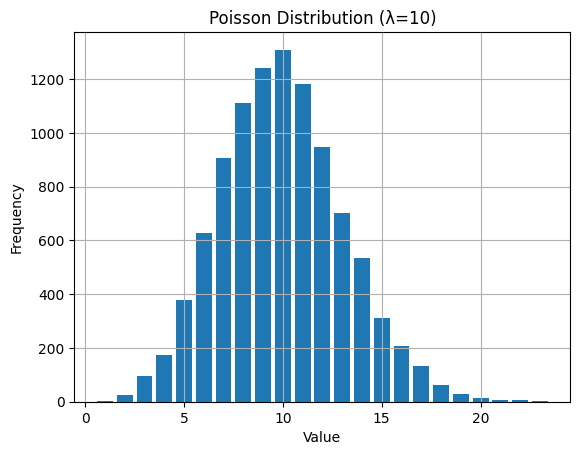

In [12]:
import matplotlib.pyplot as plt

plt.hist(poisson_data, bins=range(min(poisson_data), max(poisson_data)+1), align='left', rwidth=0.8)
plt.title("Poisson Distribution (λ=10)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()